# Milestone 3 - Daniel Krasnov

---

## Research question/interestsResearch Question:
If you're using the Zomato app, does where you are in the world affect the following:

1. The quality of food available to you (based on rating column)?
1. The price (based on price range column)?
1. The type of food (based on cuisine column)?

# Task 1
## EDA

In [129]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Read in data
#TODO fix encoding
zomatoCSV = pd.read_csv("..\\data\\raw\\zomato.csv" , encoding = "maclatin2")
countryCodesCSV = pd.read_excel("..\\data\\raw\\Country-Code.xlsx")

In [130]:
#Inital preview of ZomatoCSV
print(f"Number of rows and columns:\n{zomatoCSV.shape}")
print(f"\nColumns:\n{zomatoCSV.columns}")
print(f"\nData frame summary: ")
print(zomatoCSV.info())

Number of rows and columns:
(9551, 21)

Columns:
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Data frame summary: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Loca

In [131]:
#Inital Preview of countryCodesCSV
print(f"Number of rows and columns:\n{countryCodesCSV.shape}")
print(f"\nColumns:\n{countryCodesCSV.columns}")
print(f"\nData frame summary: ")
print(countryCodesCSV.info())

Number of rows and columns:
(15, 2)

Columns:
Index(['Country Code', 'Country'], dtype='object')

Data frame summary: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes
None


Preview looks good! It seems like we have a table of over 9000 entries with all our restaurant data and a table with matching countries. To get a sense of any null values I use visualizations adapted from [Handling Missing Data for a Beginner](https://towardsdatascience.com/handling-missing-data-for-a-beginner-6d6f5ea53436)

In [132]:
zomatoCSV.isnull().any()

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                 True
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
dtype: bool

Looks like there are missing values in Cuisines. Generating a heatmap will give us a better sense of the damage.

<AxesSubplot:>

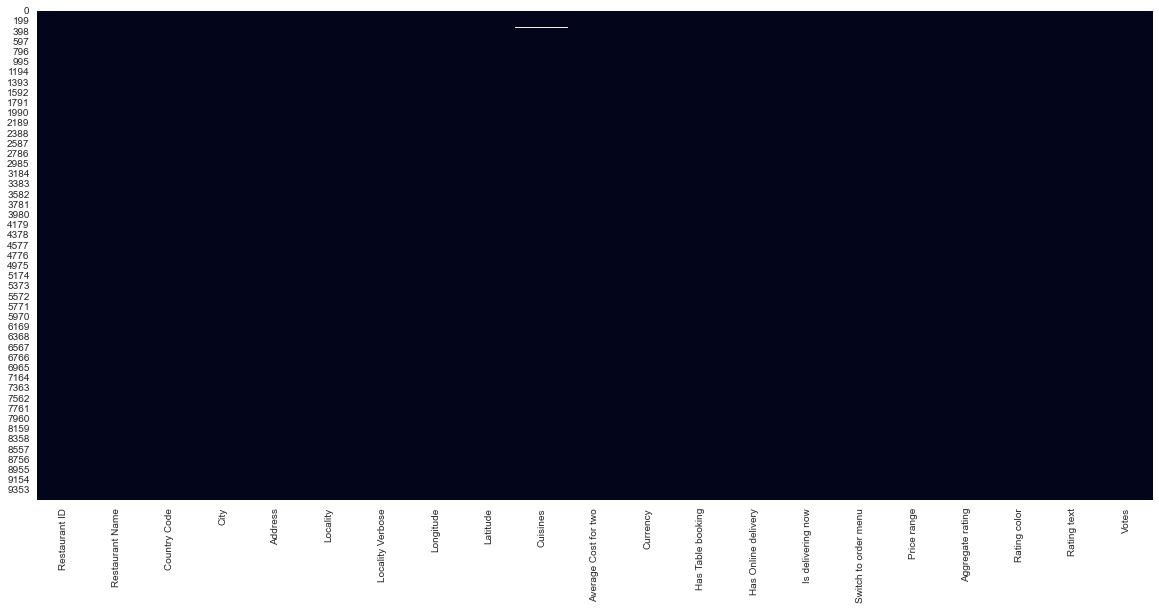

In [133]:
#Set window size
sns.set({'figure.figsize':(20,9)})
#Heatmap of null values
sns.heatmap(zomatoCSV.isnull(), cbar=False)

The impact of the missing data seems trival. Next we should check for duplicate data.

In [142]:
#Check for any duplicate values
print(f"Any duplicate values: {zomatoCSV.duplicated().any()}")

Any duplicate values: False


Overall, it looks like there is very few missing values and no duplicate data. Since part of our analysis will be conducted on what cuisines are found where I need to get a sense of what kinds of food are available for analysis.

In [136]:
zomatoCSV.sort_values(by='Cuisines')
pd.DataFrame(zomatoCSV['Cuisines'].unique())

,0
0,"French, Japanese, Desserts"
1,Japanese
2,"Seafood, Asian, Filipino, Indian"
3,"Japanese, Sushi"
4,"Japanese, Korean"
...,...
1711,Restaurant Cafe
1712,"Desserts, BŪ_rek"
1713,"Burger, Izgara"
1714,"World Cuisine, Patisserie, Cafe"


Wow we have a lot of food!

Now its time for some preliminary correlations. To do this I will need to attach the country codes csv and do some plots.


In [137]:
#Adding Country column from countryCodesCSV to zomatoCSV
zomatoCSV = zomatoCSV.merge(countryCodesCSV, how = "inner",on = "Country Code")
print(zomatoCSV.columns)
zomatoCSV.head()

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [138]:
zomatoCSV[zomatoCSV['Votes'].isin([0])]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country


First, I want to see the distribution of aggregate ratings throughout the various countries:

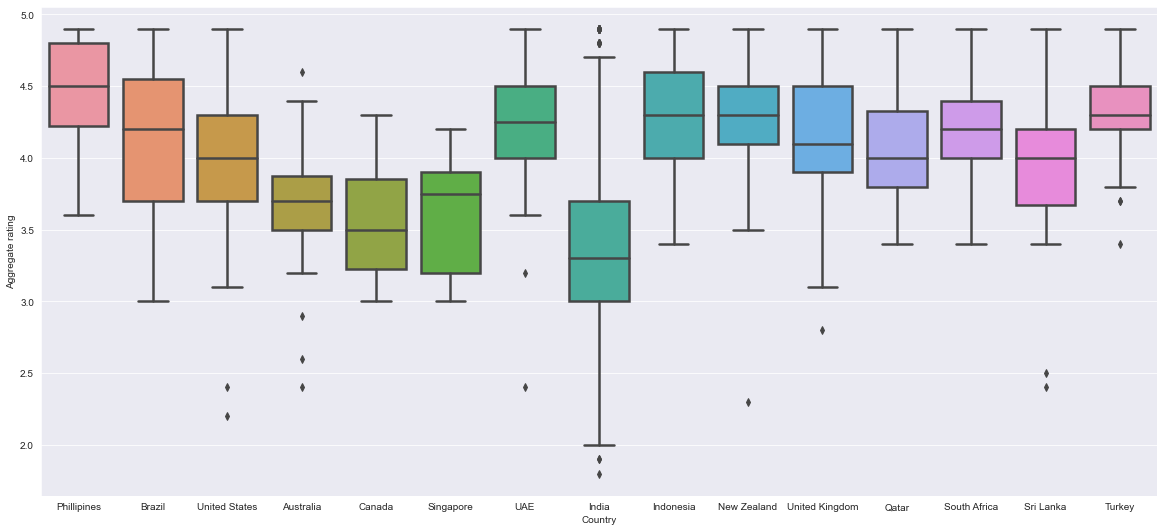

In [139]:
plot = sns.boxplot(x="Country", y="Aggregate rating", data=zomatoCSV, linewidth=2.5 )

Looks like in general restaurants average a score over 3 with the except of a few outliers. However, since I don't know how many votes each country got the data could be skewed. Next, I plot votes against country and plot countries against restaurants to get a sense of representation:

In [108]:
#Number of votes counted in each country
for index, countryName in enumerate(zomatoCSV["Country"].unique()):
    print( countryName + ": " + str(zomatoCSV[zomatoCSV["Country"].isin([countryName])]["Votes"].sum() ))

Phillipines: 8963
Brazil: 1177
United States: 185848
Australia: 2674
Canada: 412
Singapore: 638
UAE: 29611
India: 1187163
Indonesia: 16214
New Zealand: 9721
United Kingdom: 16439
Qatar: 3276
South Africa: 18910
Sri Lanka: 2929
Turkey: 14670


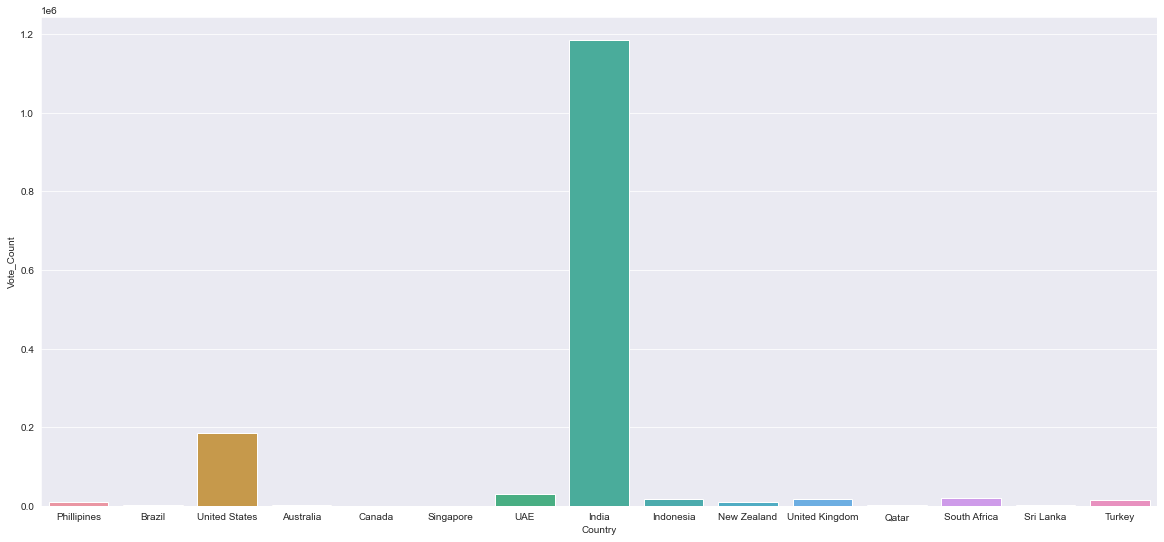

In [140]:
#Converting number of votes counted in each country into a plotable dataframe
country_and_votes = []
for index, countryName in enumerate(zomatoCSV["Country"].unique()):
    country_and_votes.append([ countryName, zomatoCSV[zomatoCSV["Country"].isin([countryName])]["Votes"].sum() ])

country_and_votes = pd.DataFrame(country_and_votes).rename(columns={0: "Country", 1: "Vote_Count"})
country_and_votes

#plotting country_and_votes
plot = sns.barplot(x="Country" , y="Vote_Count", data=country_and_votes, ci=None) #normalzie this

<AxesSubplot:>

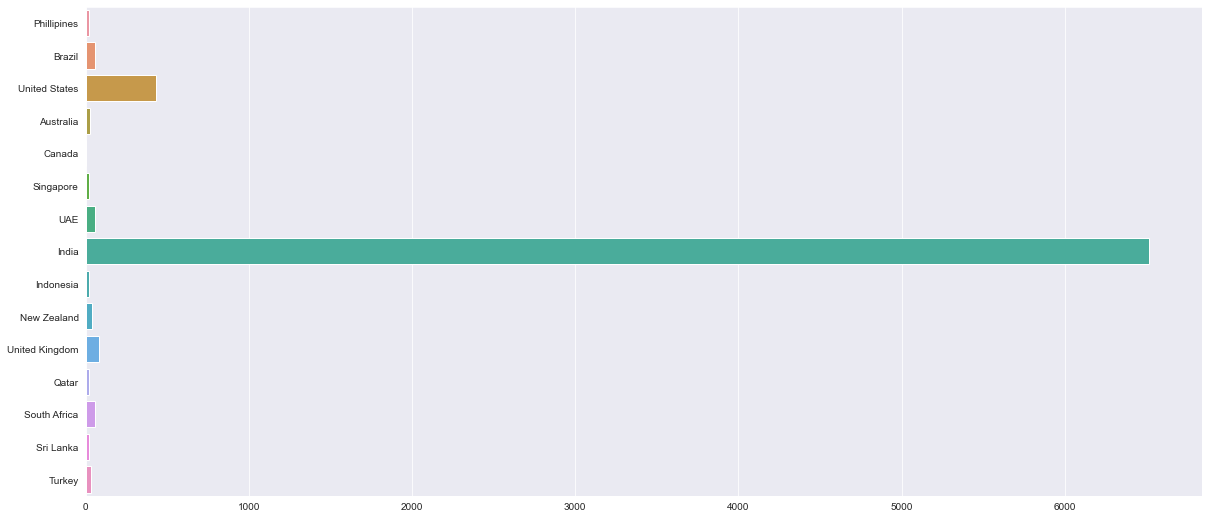

In [141]:
#Counting number of restaurants in each country and plotting them
counter = Counter(list(zomatoCSV["Country"]))
y1 = list(counter.keys())
x1 = list(counter.values())
sns.barplot(x = x1, y = y1)

There is an overrepresentation of restaurants and votes from India however, if you look at the votes recorded there are still countries with thousands of votes. This means that while India will have the most accurate insights there is still a lot of data on other countries for analysis 

<Figure size 1152x1440 with 0 Axes>

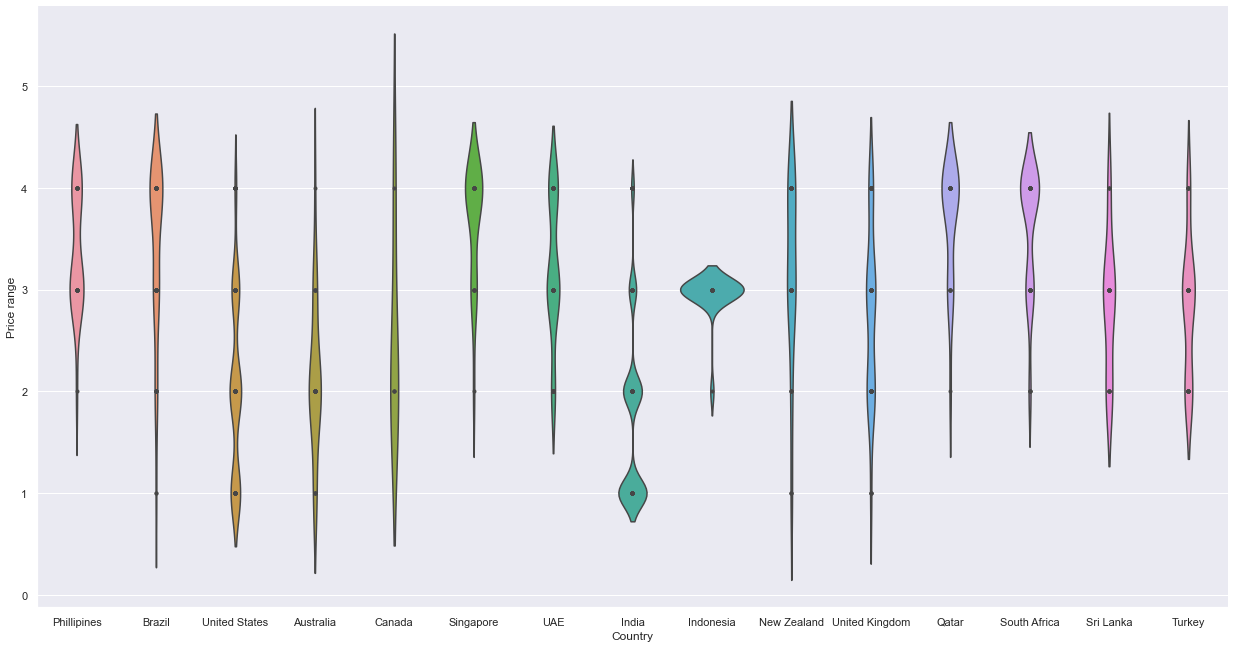

In [151]:
plt.figure(figsize=(16, 20))
vio = sns.catplot(y="Price range", x="Country", data=zomatoCSV, kind = "violin", inner = "points")
vio.fig.set_figwidth(20)
vio.fig.set_figheight(10)

There is quite a bit of variety in price ranges among countries. In Canada we see distribution not clearly centered anywhere meanwhile in somewhere like Indonesia, the majority of restaurants are at a price range of 3. Does the price range of a restaurant impact the rating?

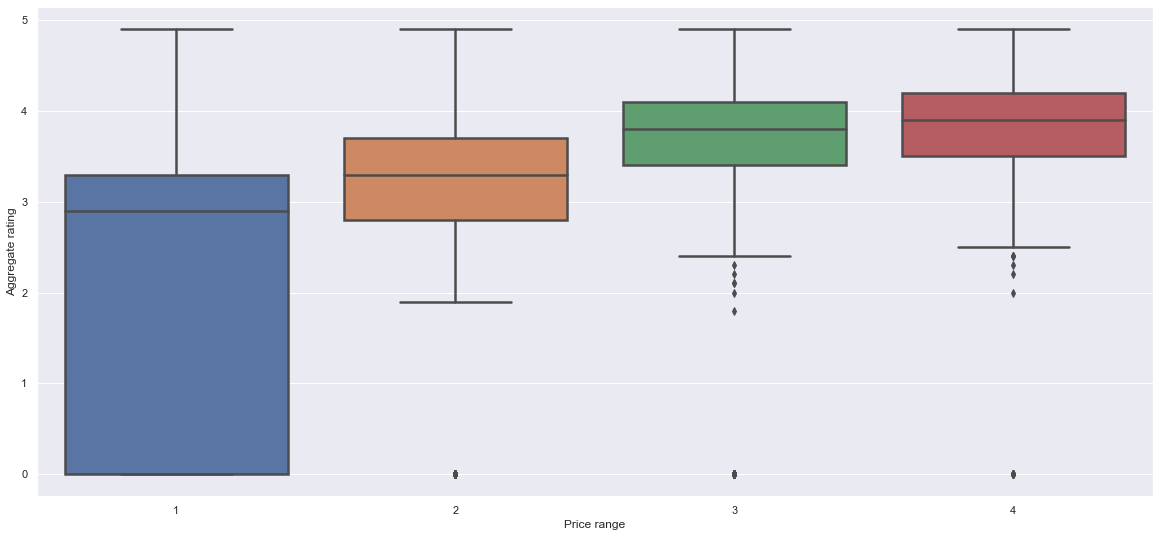

In [160]:
sns.set({'figure.figsize':(20,9)})
plot = sns.boxplot(x="Price range", y="Aggregate rating", data=zomatoCSV, linewidth=2.5 )

For price ranges from 2 - 4 the average rating stays fairly consistent at around 3 - 4. For a restaurants of price range 1 there is a large variety in ratings with most of the ratings under 3. With all of tis we have a good sense of how our data shapes up and what’s related to what. We can now begin the analysis pipeline.


# Task 2
## Analysis Pipeline
### Loading Data

In [164]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

#reading in CSVs (Don't need the json data)
zomatoCSV = pd.read_csv("..\\data\\raw\\zomato.csv" , encoding = "maclatin2") #TODO fix encoding
countryCodesCSV = pd.read_excel("..\\data\\raw\\Country-Code.xlsx")

### Cleaning Data


In [165]:
#Drop uneeded columns
zomatoCSV = zomatoCSV.drop(["Address","Rating color","Rating text","Locality","Locality Verbose","Switch to order menu","Average Cost for two"],axis = 'columns')
#Drop rows with missing values
zomatoCSV = zomatoCSV.dropna()

### Processing/Wrangling Data

In [166]:
#Merge Tables
zomatoCSV = zomatoCSV.merge(countryCodesCSV, how = "inner",on = "Country Code")

#Drop outliers/missing values
filterAgg = zomatoCSV['Aggregate rating'].isin([0.0])
zomatoCSV = zomatoCSV[filterAgg == False]

#Change indexing
zomatoCSV = zomatoCSV.set_index(['Country','City']) \
                     .drop(['Country Code'], axis = 'columns')
zomatoCSV

Restaurant ID           Restaurant Name  \
Country     City                                                        
Phillipines Makati City             6317637          Le Petit Souffle   
            Makati City             6304287          Izakaya Kikufuji   
            Mandaluyong City        6300002    Heat - Edsa Shangri-La   
            Mandaluyong City        6318506                      Ooma   
            Mandaluyong City        6314302               Sambo Kojin   
...                                     ...                       ...   
Turkey      ŘŃstanbul               5915730              NamlŘĪ Gurme   
            ŘŃstanbul               5908749             Ceviz AŘŰacŘĪ   
            ŘŃstanbul               5915807                     Huqqa   
            ŘŃstanbul               5916112              AĀŰĀŰk Kahve   
            ŘŃstanbul               5927402  Walter's Coffee Roastery   

                               Longitude   Latitude  \
Country     City                                      
Phillipines Makati City       121.027535  14.565443   
            Makati City       121.014101  14.553708   
            Mandaluyong City  121.056831  14.581404   
            Mandaluyong City  121.056475  14.585318   
            Mandaluyong City  121.057508  14.584450   
...                                  ...        ...   
Turkey      ŘŃstanbul          28.977392  41.022793   
            ŘŃstanbul          29.041297  41.009847   
            ŘŃstanbul          29.034640  41.055817   
            ŘŃstanbul          29.036019  41.057979   
            ŘŃstanbul          29.026016  40.984776   

                                                      Cuisines  \
Country     City                                                 
Phillipines Makati City             French, Japanese, Desserts   
            Makati City                               Japanese   
            Mandaluyong City  Seafood, Asian, Filipino, Indian   
            Mandaluyong City                   Japanese, Sushi   
            Mandaluyong City                  Japanese, Korean   
...                                                        ...   
Turkey      ŘŃstanbul                                  Turkish   
            ŘŃstanbul          World Cuisine, Patisserie, Cafe   
            ŘŃstanbul                   Italian, World Cuisine   
            ŘŃstanbul                          Restaurant Cafe   
            ŘŃstanbul                                     Cafe   

                                      Currency Has Table booking  \
Country     City                                                   
Phillipines Makati City       Botswana Pula(P)               Yes   
            Makati City       Botswana Pula(P)               Yes   
            Mandaluyong City  Botswana Pula(P)               Yes   
            Mandaluyong City  Botswana Pula(P)                No   
            Mandaluyong City  Botswana Pula(P)               Yes   
...                                        ...               ...   
Turkey      ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   

                             Has Online delivery Is delivering now  \
Country     City                                                     
Phillipines Makati City                       No                No   
            Makati City                       No                No   
            Mandaluyong City                  No                No   
            Mandaluyong City                  No                No   
            Mandaluyong City                  No                No   
...                                          ...               ...   
Turkey      ŘŃstanbul                         No            

# Task 3
## Method Chaining
### Step 1

In [230]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

#Method chain 1 - load in/clean zomato.csv
zomato_df = (
 pd.DataFrame(pd.read_csv("..\\data\\raw\\zomato.csv" , encoding = "maclatin2")) #TODO fix encoding
 .drop(["Address","Rating color","Rating text","Locality","Locality Verbose","Switch to order menu","Average Cost for two"],axis = 'columns')
 .dropna()
)

#Method chain 2 - load in Country-Code.xlsx
country_df = (
    pd.DataFrame(pd.read_excel("..\\data\\raw\\Country-Code.xlsx"))
)

#Method chain 3 - process/wrangle/merge country_df and zomato_df
zomato_cleaned = (
 pd.merge(zomato_df,country_df, how = "inner",on = "Country Code")
 #zomato_df = zomato_df[(zomato_df['Aggregate rating'].isin([0.0])) == False]
 .set_index(['Country','City']) 
 .drop(['Country Code'], axis = 'columns')

)

#Testing output
print(f"Method Chain 1:\n{zomato_df.head()}")
print(f"Method Chain 2:\n{country_df.head()}")
print(f"Method Chain 3:\n{zomato_cleaned.head()}")

Method Chain 1:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

    Longitude   Latitude                          Cuisines          Currency  \
0  121.027535  14.565443        French, Japanese, Desserts  Botswana Pula(P)   
1  121.014101  14.553708                          Japanese  Botswana Pula(P)   
2  121.056831  14.581404  Seafood, Asian, Filipino, Indian  Botswana Pula(P)   
3  121.056475  14.585318                   Japanese, Sushi  Botswana Pula(P)   
4  121.057508  14.584450                  Japanese, Korean  Botswana Pula(P)   

  Has Table booking Has Online delivery Is del

In [ ]:
def filter_zomato(zomato_df):
    zomato_df = zomato_df[(zomato_df['Aggregate rating'].isin([0.0])) == False]
    return zomato_df

### Step 2

In [170]:
def clean_and_merge_zomato(zomato_file_path, country_codes_file_path):
    """
    Loads, cleans, processes, and wrangles zomato.csv and Country-Code.xlsx
    
    Arguments:
    zomato_file_path - (str) the file path for the zomato.csv
    
    country_codes_file_path - (str) the file path for the Country-Code.xlsx
    """
    
    #Method chain 1 - load in/clean zomato.csv
    zomato_df = (
     pd.DataFrame(pd.read_csv(zomato_file_path , encoding = "maclatin2")) #TODO fix encoding
     .drop(["Address","Rating color","Rating text","Locality","Locality Verbose","Switch to order menu","Average Cost for two"],axis = 'columns')
     .dropna()
    )
    
    #Method chain 2 - load in Country-Code.xlsx 
    country_df = (
        pd.DataFrame(pd.read_excel(country_codes_file_path))
    )
    
    #Method chain 3 process/wrangle/merge country_df and zomato_df
    zomato_cleaned = (
     pd.merge(zomato_df,country_df, how = "inner",on = "Country Code")
     #filter data set here - use assign
     .set_index(['Country','City']) 
     .drop(['Country Code'], axis = 'columns')
    )
    
    return zomato_cleaned

In [171]:
#Testing function
test = clean_and_merge_zomato("..\\data\\raw\\zomato.csv","..\\data\\raw\\Country-Code.xlsx")
test

Restaurant ID           Restaurant Name  \
Country     City                                                        
Phillipines Makati City             6317637          Le Petit Souffle   
            Makati City             6304287          Izakaya Kikufuji   
            Mandaluyong City        6300002    Heat - Edsa Shangri-La   
            Mandaluyong City        6318506                      Ooma   
            Mandaluyong City        6314302               Sambo Kojin   
...                                     ...                       ...   
Turkey      ŘŃstanbul               5915730              NamlŘĪ Gurme   
            ŘŃstanbul               5908749             Ceviz AŘŰacŘĪ   
            ŘŃstanbul               5915807                     Huqqa   
            ŘŃstanbul               5916112              AĀŰĀŰk Kahve   
            ŘŃstanbul               5927402  Walter's Coffee Roastery   

                               Longitude   Latitude  \
Country     City                                      
Phillipines Makati City       121.027535  14.565443   
            Makati City       121.014101  14.553708   
            Mandaluyong City  121.056831  14.581404   
            Mandaluyong City  121.056475  14.585318   
            Mandaluyong City  121.057508  14.584450   
...                                  ...        ...   
Turkey      ŘŃstanbul          28.977392  41.022793   
            ŘŃstanbul          29.041297  41.009847   
            ŘŃstanbul          29.034640  41.055817   
            ŘŃstanbul          29.036019  41.057979   
            ŘŃstanbul          29.026016  40.984776   

                                                      Cuisines  \
Country     City                                                 
Phillipines Makati City             French, Japanese, Desserts   
            Makati City                               Japanese   
            Mandaluyong City  Seafood, Asian, Filipino, Indian   
            Mandaluyong City                   Japanese, Sushi   
            Mandaluyong City                  Japanese, Korean   
...                                                        ...   
Turkey      ŘŃstanbul                                  Turkish   
            ŘŃstanbul          World Cuisine, Patisserie, Cafe   
            ŘŃstanbul                   Italian, World Cuisine   
            ŘŃstanbul                          Restaurant Cafe   
            ŘŃstanbul                                     Cafe   

                                      Currency Has Table booking  \
Country     City                                                   
Phillipines Makati City       Botswana Pula(P)               Yes   
            Makati City       Botswana Pula(P)               Yes   
            Mandaluyong City  Botswana Pula(P)               Yes   
            Mandaluyong City  Botswana Pula(P)                No   
            Mandaluyong City  Botswana Pula(P)               Yes   
...                                        ...               ...   
Turkey      ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   

                             Has Online delivery Is delivering now  \
Country     City                                                     
Phillipines Makati City                       No                No   
            Makati City                       No                No   
            Mandaluyong City                  No                No   
            Mandaluyong City                  No                No   
            Mandaluyong City                  No                No   
...                                          ...               ...   
Turkey      ŘŃstanbul                         No            

### Step 3

In [8]:
#import my function
from project_functions1 import clean_and_merge_zomato
test = clean_and_merge_zomato("..\\data\\raw\\zomato.csv","..\\data\\raw\\Country-Code.xlsx")
test

Restaurant ID           Restaurant Name  \
Country     City                                                        
Phillipines Makati City             6317637          Le Petit Souffle   
            Makati City             6304287          Izakaya Kikufuji   
            Mandaluyong City        6300002    Heat - Edsa Shangri-La   
            Mandaluyong City        6318506                      Ooma   
            Mandaluyong City        6314302               Sambo Kojin   
...                                     ...                       ...   
Turkey      ŘŃstanbul               5915730              NamlŘĪ Gurme   
            ŘŃstanbul               5908749             Ceviz AŘŰacŘĪ   
            ŘŃstanbul               5915807                     Huqqa   
            ŘŃstanbul               5916112              AĀŰĀŰk Kahve   
            ŘŃstanbul               5927402  Walter's Coffee Roastery   

                               Longitude   Latitude  \
Country     City                                      
Phillipines Makati City       121.027535  14.565443   
            Makati City       121.014101  14.553708   
            Mandaluyong City  121.056831  14.581404   
            Mandaluyong City  121.056475  14.585318   
            Mandaluyong City  121.057508  14.584450   
...                                  ...        ...   
Turkey      ŘŃstanbul          28.977392  41.022793   
            ŘŃstanbul          29.041297  41.009847   
            ŘŃstanbul          29.034640  41.055817   
            ŘŃstanbul          29.036019  41.057979   
            ŘŃstanbul          29.026016  40.984776   

                                                      Cuisines  \
Country     City                                                 
Phillipines Makati City             French, Japanese, Desserts   
            Makati City                               Japanese   
            Mandaluyong City  Seafood, Asian, Filipino, Indian   
            Mandaluyong City                   Japanese, Sushi   
            Mandaluyong City                  Japanese, Korean   
...                                                        ...   
Turkey      ŘŃstanbul                                  Turkish   
            ŘŃstanbul          World Cuisine, Patisserie, Cafe   
            ŘŃstanbul                   Italian, World Cuisine   
            ŘŃstanbul                          Restaurant Cafe   
            ŘŃstanbul                                     Cafe   

                                      Currency Has Table booking  \
Country     City                                                   
Phillipines Makati City       Botswana Pula(P)               Yes   
            Makati City       Botswana Pula(P)               Yes   
            Mandaluyong City  Botswana Pula(P)               Yes   
            Mandaluyong City  Botswana Pula(P)                No   
            Mandaluyong City  Botswana Pula(P)               Yes   
...                                        ...               ...   
Turkey      ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   
            ŘŃstanbul         Turkish Lira(TL)                No   

                             Has Online delivery Is delivering now  \
Country     City                                                     
Phillipines Makati City                       No                No   
            Makati City                       No                No   
            Mandaluyong City                  No                No   
            Mandaluyong City                  No                No   
            Mandaluyong City                  No                No   
...                                          ...               ...   
Turkey      ŘŃstanbul                         No            

# Task 4

Research Question:
If you're using the Zomato app, how does where you are in the world affect the following:

1. The quality of food you will find on Zomato (based on rating column)?
1. The price range you will find on Zomato (based on price range column)?
1. The types of food you will find on Zomato (based on cuisine column)?

### Part 1

To answer how where I am in the world affects the quality of my food on Zomato, I'm going to want to see the distribution of aggregate ratings throughout the countries in my dataset:

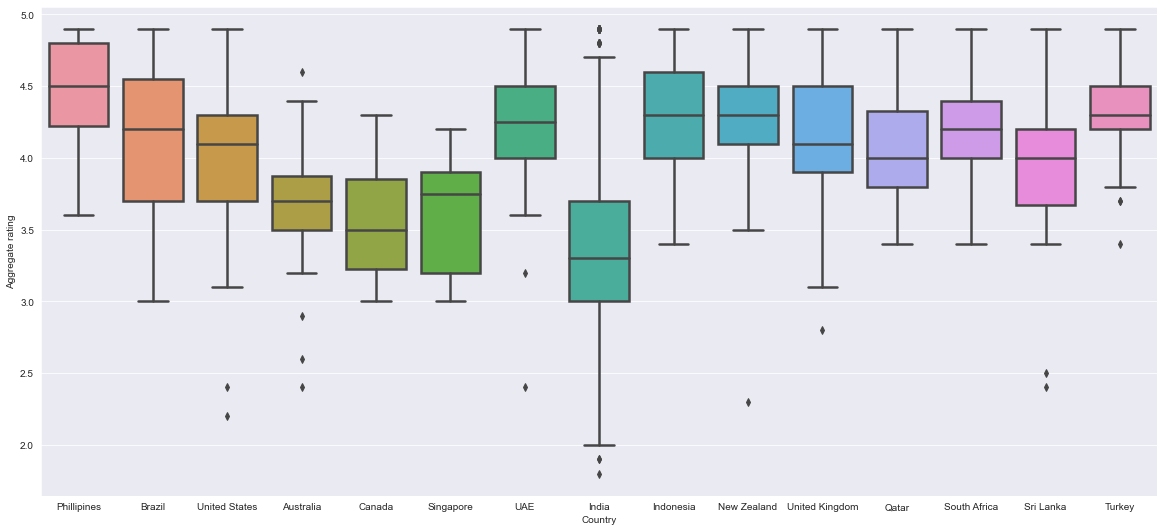

In [227]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from project_functions1 import clean_and_merge_zomato

#Load in data frame
zomato = clean_and_merge_zomato("..\\data\\raw\\zomato.csv","..\\data\\raw\\Country-Code.xlsx")
#CHANGE THIS LATER!!! - Manual filter for removies missing values
zomato = zomato[(zomato['Aggregate rating'].isin([0.0])) == False]
plot = sns.boxplot(x="Country", y="Aggregate rating", data=zomato.reset_index(), linewidth=2.5 )

To understand amount of data collected for each country I will print the total number of votes recorded for each country and the total number of restaurants for each country:

In [228]:
#Number of votes counted in each country

print("Total number of votes in each country:")
#These part of the analysis is easier to write with rest indexes
zomato = zomato.reset_index()

for index, countryName in enumerate(zomato["Country"].unique()):
    print(f"{countryName}: {zomato[zomato['Country'].isin([countryName])]['Votes'].sum()}")

#Number of restaurants in each country
counter = Counter(list(zomato["Country"]))
print("\nTotal number of restaurants in each country:")
for key, value in counter.items():
    print(f"{key}: {value}")


Total number of votes in each country:
Phillipines: 8963
Brazil: 1170
United States: 183116
Australia: 2674
Canada: 412
Singapore: 638
UAE: 29611
India: 1185310
Indonesia: 16214
New Zealand: 9721
United Kingdom: 16436
Qatar: 3276
South Africa: 18910
Sri Lanka: 2929
Turkey: 14670

Total number of restaurants in each country:
Phillipines: 22
Brazil: 55
United States: 422
Australia: 24
Canada: 4
Singapore: 20
UAE: 60
India: 6513
Indonesia: 21
New Zealand: 40
United Kingdom: 79
Qatar: 20
South Africa: 60
Sri Lanka: 20
Turkey: 34


Here we can see the average ratings of restaurants thoughout the countries in the data set some notable features are:
1. The Philippines has the highest average aggregate rating of 4.5—time to find a Filipino chef!
1. This dataset is very India oreientated with 1185310 votes and 6513 restaurants
1. Data from Canada can all but be ignored since it has a restaurant count of 4

This gives us an overall sense of quality of food by country but how about by city or region? Do dense cities have higher rated food than rural farmlands? To visualize this we can plot all restauarnts on a map whose average rating is greater than or equal to 4.


In [229]:
#I can change the dataframe back to heirarchal indexes for this part
zomato = clean_and_merge_zomato("..\\data\\raw\\zomato.csv","..\\data\\raw\\Country-Code.xlsx")
#CHANGE THIS LATER!!! - Manual filter for removies missing values
zomato = zomato[(zomato['Aggregate rating'].isin([0.0])) == False]

#Getting list of long/lat
long = zomato.loc['United States']['Longitude']
lat = zomato.loc['United States']['Latitude']
rating = zomato.loc['United']
locationlist = [] 




for index in range(0, (len(long))):
    locationlist.append([lat[index],long[index]])

#Creating interactive map for USA
map = folium.Map(location=[39.7392,-104.9903], zoom_start=3)
for point in range(0, len(#List length here)):
    folium.Marker(locationlist[point], popup = zomato[]).add_to(map)
map  


NameError: name 'zomato' is not defined

<AxesSubplot:>

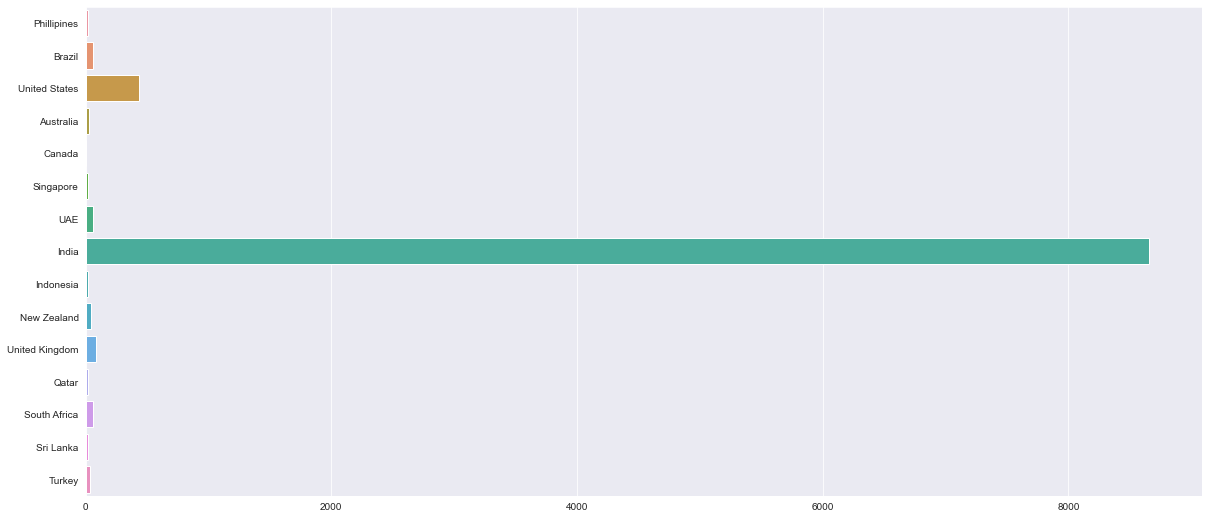

In [41]:
counter = Counter(list(zomatoCSV["Country"]))
y1 = list(counter.keys())
x1 = list(counter.values())
sns.barplot(x = x1, y = y1)

In [39]:
#Importing counter
from collections import Counter

#Getting a dictionary of the counts of each unique food type
#zomatoCSV['Cuisines_split'] = zomatoCSV['Cuisines'].str.split(',')
seq = list((zomatoCSV.loc['Restaurant Name'].value_counts()).index)
dict = {key.strip(): value for key, value in Counter(x for xs in seq for x in set(xs)).items()}
dict

KeyError: 'Restaurant Name'